In [1]:
#%matplotlib inline
%matplotlib notebook

In [2]:
import math
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from scipy import sparse
import scipy
import scipy.sparse.linalg as linalg

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
a = 1
b = 1
m = 4
h = 1 / m
eps = 1e-9
number = np.zeros((m + 1, m + 1), dtype = int)

In [4]:
def check_in(x, y): #function of checking 
        return (((-x + 0.5) < y) and ((x + 0.5) > y) and
                ((-x + 1.5) > y) and (x < 1) and (y > 0))

In [5]:
def check_border(x,y):
    return (x >= 0) and (y >= 0) and (x <= 1) and (y <= 1) and (((-x + 0.5) == y) or ((x + 0.5) == y) or ((-x + 1.5) == y) or ((x == 1) and (y <= 0.5)) or ((y == 0) and (x >= 0.5)));

In [6]:
def f(x, y):
    return 2.0 * math.pi * math.pi * math.sin(math.pi * x) * math.sin(math.pi * y)

def phi(x, y):
    return math.sin(math.pi * x) * math.sin(math.pi * y)

In [7]:
cnt = 0
for i in range(1, m):
    for j in range(1, m):
        if check_in(i / m, j / m):
            number[i][j] = cnt
            cnt += 1

In [8]:
x = np.zeros((m + 1, m + 1))
y = np.zeros((m + 1, m + 1))
indicate = np.zeros((m + 1,m + 1),dtype = int)
x1 = 0
y1 = 0
k = 0

for i in range(1, m + 1):
    for j in range(1, m + 1):
        x[i][j] = i / m
        y[i][j] = j / m
        
for i in range(0, m + 1):
    x1=0
    for j in range(0, m + 1):
        if (check_in(x1,y1)):
            indicate[i][j] = k
            k=k+1
        else :
            if (check_border(x1, y1)):
                indicate[i][j] = -1
            else :
                indicate[i][j] = -2
        x1 = x1 + h           
    y1 = y1 + h

In [9]:
A = np.zeros((cnt, cnt), dtype = float)
z = np.zeros(cnt)

In [10]:
k = 0
y1 = h
for i in range(1, m):
    x1 = h
    for j in range(1, m):
        if (indicate[i][j] >= 0) :
            A[k][k] = 2 * (a + b)/(h*h)
            z[k] =  f(x1, y1)
            if (indicate[i - 1][j] >= 0) :
                A[k][indicate[i - 1][j]] = -b/(h*h)
            else :
                if (indicate[i - 1][j] == -1) :
                    z[k] += b * phi(x[i - 1][j],y[i-1][j])/(h*h)
                else :
                    print("error_1 ")
                    
            if (indicate[i][j - 1] >= 0) :
                A[k][k - 1] = -a/(h*h)
            else :    
                if (indicate[i][j - 1] == -1) :
                    z[k] += a * phi(x[i][j - 1],y[i][j-1])/(h*h)
                else :
                    print("error_2 ")   
                    
            if (indicate[i + 1][j] >= 0) :
                A[k][indicate[i + 1][j]] = -b/(h*h)
            else :
                if (indicate[i + 1][j] == -1) :
                    z[k] += b * phi(x[i + 1][j],y[i+1][j])/(h*h)
                else :
                    print("error_3 ") 
                    
            if (indicate[i][j + 1] >= 0) :
                A[k][k + 1] = -a/(h*h)
            else :
                if (indicate[i][j + 1] == -1) :
                    z[k] += phi(x[i][j + 1],y[i][j+1])/(h*h)
                else :
                    print("error_4 ")
                    
            k = k + 1
        x1 = x1 + h
    y1 = y1 + h
    


In [11]:
def find_e(A): # Function to find eigs 
    size = A.shape[0] 
    y = np.array([1 for i in range(size)]) 
    x = y / np.linalg.norm(y) 
    eps = 10e-6 
    lam1 = 4 
    lam2 = 1 

    while abs(lam2 - lam1) > eps: 
        y = A.dot(x) 
        lam1 = lam2 
        lam2 = y.T.dot(x) 
        x = y / np.linalg.norm(y) 

    eigs = np.linalg.eig(A)[0] 

    eigs = np.sort(eigs) 
    print("Eigs: ", eigs[0], " ", eigs[size - 1])

In [12]:
print(A)
find_e(A)
A = csr_matrix(A)
#print(A)
#max = scipy.sparse.linalg.eigsh(A,k=5, sigma=0.5)[0]
#print(max)
print(indicate)

[[ 64. -16.   0. -16.   0.   0.]
 [-16.  64.   0.   0. -16.   0.]
 [  0.   0.  64. -16.   0.   0.]
 [-16.   0. -16.  64. -16. -16.]
 [  0. -16.   0. -16.  64.   0.]
 [  0.   0.   0. -16.   0.  64.]]
Eigs:  27.38807021966818   100.61192978033175
[[-2 -2 -1 -1 -1]
 [-2 -1  0  1 -1]
 [-1  2  3  4 -1]
 [-2 -1  5 -1 -2]
 [-2 -2 -1 -2 -2]]


In [13]:
u_my = linalg.spsolve(A, z)

In [14]:
u = np.zeros((m + 1, m + 1), dtype='float64')
for i in range(m + 1):
    for j in range(m + 1):
        if (indicate[i][j] >= 0):
            u[i][j] = u_my[indicate[i][j]]
        else :
            if (indicate[i][j] == -1):
                u[i][j] = phi(x[i][j], y[i][j])
            else :
                u[i][j] = 0

In [15]:
u_real = np.zeros((m + 1, m + 1), dtype='float64')
for i in range(m + 1):
    for j in range(m + 1):
        if (indicate[i][j] >= -1):
            u_real[i][j] = phi(x[i][j], y[i][j])
        else :
            u_real[i][j] = 0

In [16]:
print(sla.norm(u - u_real))

0.06423848246925326


<IPython.core.display.Javascript object>


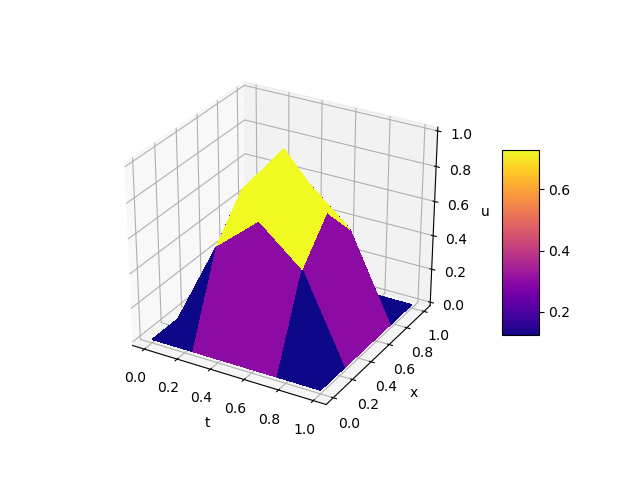

In [17]:
X, Y = np.meshgrid(np.linspace(0, 1, m  + 1), np.linspace(0, 1, m  + 1))

fig = plt.figure()
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm,
 #                     linewidth=0, antialiased=False)

surf_ = ax.plot_surface(X, Y, u_real, cmap=cm.plasma,
                        linewidth=0, antialiased=False)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

#fig.colorbar(surf, shrink=0.5, aspect=5)
fig.colorbar(surf_, shrink=0.5, aspect=5)

plt.show()

(5, 5) (5, 5)


<IPython.core.display.Javascript object>


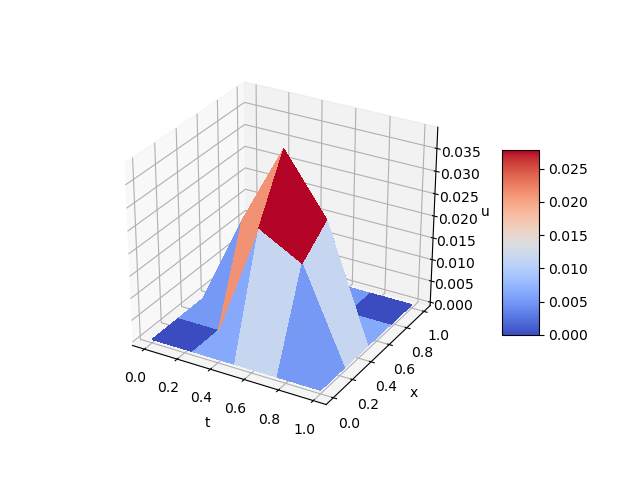

In [18]:
X, Y = np.meshgrid(np.linspace(0, 1, m  + 1), np.linspace(0, 1, m  + 1))

print(X.shape, Y.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u - u_real, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()